In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Reading data from excel sheet
soil_data = pd.read_excel('soil_data.xlsx', header=None)


In [21]:
# Data cleaning and preprocessing
# Remove unwanted rows and columns
soil_data = soil_data.drop(np.arange(410, 422))
soil_data = soil_data.iloc[2:, 10:]

# Set column names
column_names = ['Vegetation Cover', 'NO3', 'NH4', 'P', 'K', 'SO4', 'B', 'Organic Matter',
                'pH', 'Zn', 'Cu', 'Fe', 'Ca', 'Mg', 'Na']
soil_data.columns = column_names

# Handle missing values
soil_data.fillna(0, inplace=True)

imputer = SimpleImputer(strategy='median')
soil_data = pd.DataFrame(imputer.fit_transform(soil_data), columns=soil_data.columns)

print('Missing values per column:')
print(soil_data.isna().sum())

# Save processed data to CSV
soil_data.to_csv('processed_data_set.csv', index=False)


Missing values per column:
Vegetation Cover    0
NO3                 0
NH4                 0
P                   0
K                   0
SO4                 0
B                   0
Organic Matter      0
pH                  0
Zn                  0
Cu                  0
Fe                  0
Ca                  0
Mg                  0
Na                  0
dtype: int64


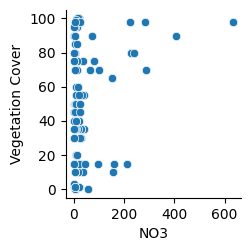

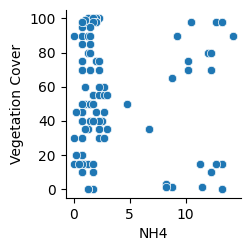

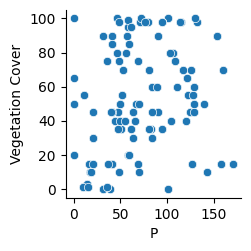

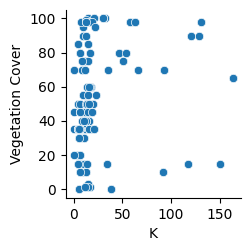

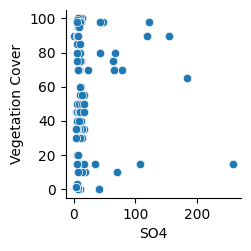

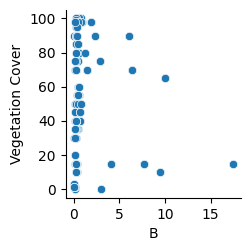

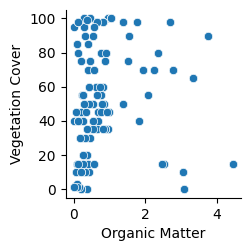

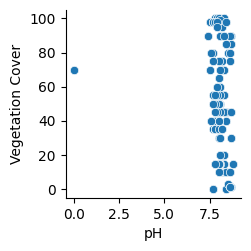

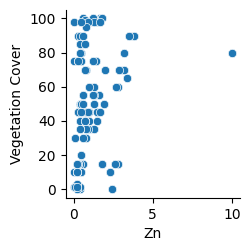

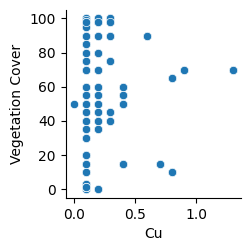

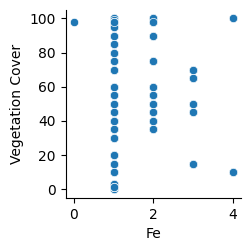

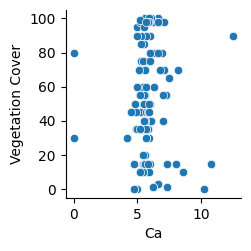

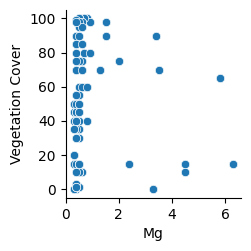

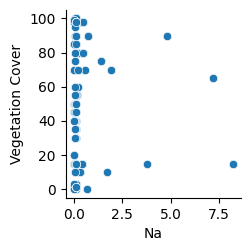

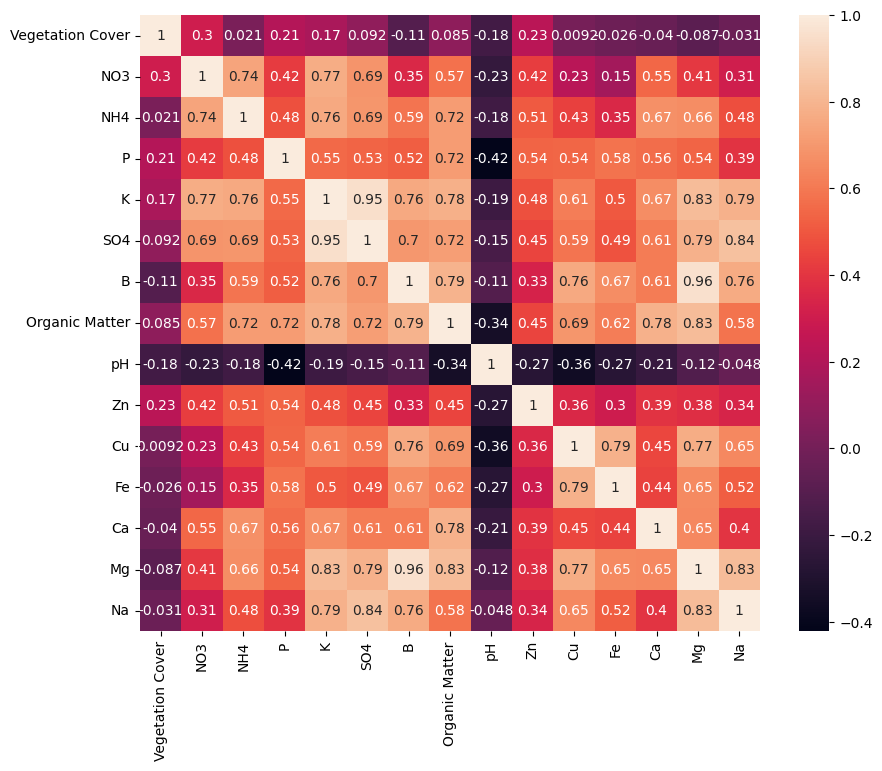

In [22]:
# Data Visualization
# Pairplots
for col in soil_data.columns[1:]:
    sns.pairplot(soil_data, x_vars=col, y_vars='Vegetation Cover')
    plt.show()

# Correlation Matrix
corr_matrix = soil_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [18]:
# Splitting data into features and target
X = soil_data.drop('Vegetation Cover', axis=1)
Y = soil_data['Vegetation Cover']

# Normalizing data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

def train(model, X_train, Y_train):
    return model.fit(X_train, Y_train)

def print_metrics(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)

    # Convert R² score to percentage
    accuracy_percentage = r2 * 100

    print(f'Mean Squared Error : {mse:.10f}')
    print(f'Root Mean Squared Error : {rmse:.10f}')
    print(f'Mean Absolute Error : {mae:.10f}')
    print(f'R2 Score : {r2:.10f}')
    print(f'Accuracy : {accuracy_percentage:.2f}%')

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.10, random_state=43)

# Linear Regression Model
linear_model = LinearRegression()
linear_model = train(linear_model, X_train, Y_train)
print('Linear Regression Metrics:')
print_metrics(linear_model, X_test, Y_test)
print("\n")

# Save the model and scalers
joblib.dump(linear_model, 'linear_model.joblib')
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_Y, 'scaler_Y.joblib')

# Decision Tree Regression Model
tree_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8, min_samples_leaf=5)
tree_regressor = train(tree_regressor, X_train, Y_train)
print('Decision Tree Regression Metrics:')
print_metrics(tree_regressor, X_test, Y_test)
print("\n")

joblib.dump(tree_regressor, 'decision_tree_model.joblib')

# Random Forest Regression Model
forest_regressor = RandomForestRegressor(criterion='squared_error', max_depth=8, n_estimators=10, random_state=0)
forest_regressor = train(forest_regressor, X_train, Y_train)
print('Random Forest Regression Metrics:')
print_metrics(forest_regressor, X_test, Y_test)
print("\n")

joblib.dump(forest_regressor, 'random_forest_model.joblib')


Linear Regression Metrics:
Mean Squared Error : 0.0690251878
Root Mean Squared Error : 0.2627264506
Mean Absolute Error : 0.2223975804
R2 Score : 0.1724460398
Accuracy : 17.24%


Decision Tree Regression Metrics:
Mean Squared Error : 0.0183997424
Root Mean Squared Error : 0.1356456501
Mean Absolute Error : 0.0931432460
R2 Score : 0.7794025606
Accuracy : 77.94%


Random Forest Regression Metrics:
Mean Squared Error : 0.0052921735
Root Mean Squared Error : 0.0727473264
Mean Absolute Error : 0.0500568320
R2 Score : 0.9365512898
Accuracy : 93.66%




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['random_forest_model.joblib']

In [23]:
# Splitting data into features and target
X = soil_data.drop('Vegetation Cover', axis=1)
Y = soil_data['Vegetation Cover']

# Normalizing data with feature names
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1))


In [24]:
def train(model, X_train, Y_train):
    return model.fit(X_train, Y_train)

def print_metrics(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)

    # Convert R² score to percentage
    accuracy_percentage = r2 * 100

    print(f'Mean Squared Error : {mse:.10f}')
    print(f'Root Mean Squared Error : {rmse:.10f}')
    print(f'Mean Absolute Error : {mae:.10f}')
    print(f'R2 Score : {r2:.10f}')
    print(f'Accuracy : {accuracy_percentage:.2f}%')

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.10, random_state=43)


In [25]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model = train(linear_model, X_train, Y_train)
print('Linear Regression Metrics:')
print_metrics(linear_model, X_test, Y_test)

# Save the model and scalers
joblib.dump(linear_model, 'linear_model.joblib')
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_Y, 'scaler_Y.joblib')


Linear Regression Metrics:
Mean Squared Error : 0.0690251878
Root Mean Squared Error : 0.2627264506
Mean Absolute Error : 0.2223975804
R2 Score : 0.1724460398
Accuracy : 17.24%


['scaler_Y.joblib']

In [26]:
# Decision Tree Regression Model
tree_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8, min_samples_leaf=5)
tree_regressor = train(tree_regressor, X_train, Y_train)
print('Decision Tree Regression Metrics:')
print_metrics(tree_regressor, X_test, Y_test)

joblib.dump(tree_regressor, 'decision_tree_model.joblib')


Decision Tree Regression Metrics:
Mean Squared Error : 0.0183997424
Root Mean Squared Error : 0.1356456501
Mean Absolute Error : 0.0931432460
R2 Score : 0.7794025606
Accuracy : 77.94%


['decision_tree_model.joblib']

In [27]:
# Random Forest Regression Model
forest_regressor = RandomForestRegressor(criterion='squared_error', max_depth=8, n_estimators=10, random_state=0)
forest_regressor = train(forest_regressor, X_train, Y_train)
print('Random Forest Regression Metrics:')
print_metrics(forest_regressor, X_test, Y_test)

joblib.dump(forest_regressor, 'random_forest_model.joblib')


Random Forest Regression Metrics:
Mean Squared Error : 0.0052921735
Root Mean Squared Error : 0.0727473264
Mean Absolute Error : 0.0500568320
R2 Score : 0.9365512898
Accuracy : 93.66%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['random_forest_model.joblib']

In [28]:
# Prediction using the Random Forest Model
# Load the saved model and scalers
forest_regressor = joblib.load('random_forest_model.joblib')
scaler_X = joblib.load('scaler_X.joblib')
scaler_Y = joblib.load('scaler_Y.joblib')

# Accept input values
input_features = []
feature_names = ['NO3', 'NH4', 'P', 'K', 'SO4', 'B', 'Organic Matter', 'pH','Zn', 'Cu', 'Fe', 'Ca', 'Mg', 'Na']

print("Please enter the following soil nutrient values:")
for feature in feature_names:
    while True:
        try:
            value = float(input(f'Enter {feature} value: '))
            input_features.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

# Convert input features to DataFrame
input_df = pd.DataFrame([input_features], columns=feature_names)

# Scale the input features
input_scaled = scaler_X.transform(input_df)

# Make prediction
prediction_scaled = forest_regressor.predict(input_scaled)

# Inverse transform the prediction to get the original scale
prediction = scaler_Y.inverse_transform(prediction_scaled.reshape(-1, 1))
prediction_value = prediction[0][0]

print(f'\nPrediction: {prediction_value:.2f}% Vegetation Cover')

# Provide advice based on the prediction
text = ""
if prediction_value < 90:
    text = "Your soil is less fertile. You may try increasing these nutrients: "
    nutrient_flags = []
    # Thresholds based on domain knowledge
    if input_features[0] < 12.75:  # NO3
        nutrient_flags.append('NO3')
    if input_features[2] < 47:     # P
        nutrient_flags.append('P')
    if input_features[8] < 0.6:    # Zn
        nutrient_flags.append('Zn')
    if input_features[3] < 15:     # K
        nutrient_flags.append('K')
    if input_features[6] < 0.28:   # Organic Matter
        nutrient_flags.append('Organic Matter')
    if input_features[10] < 1:     # Fe
        nutrient_flags.append('Fe')
    if nutrient_flags:
        text += ', '.join(nutrient_flags)
    else:
        text += "All nutrient levels are adequate."
else:
    text = "Your soil is highly fertile."

print(text)


Please enter the following soil nutrient values:
Enter NO3 value: 2
Enter NH4 value: 332
Enter P value: 23
Enter K value: 211
Enter SO4 value: 12
Enter B value: 3
Enter Organic Matter value: 23
Enter pH value: 5
Enter Zn value: 34
Enter Cu value: 122
Enter Fe value: 12
Enter Ca value: 43
Enter Mg value: 23
Enter Na value: 23

Prediction: 25.50% Vegetation Cover
Your soil is less fertile. You may try increasing these nutrients: NO3, P
